## simple linear regression 


In [1]:
from warnings import filterwarnings
Warning('ignore')

Warning('ignore')

## read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

## profit depends on RND 
## PROFIT = B0+B1*RND
## separate x(RND) and y(PROFIT)


In [7]:
import seaborn as sns

<Axes: xlabel='RND', ylabel='PROFIT'>

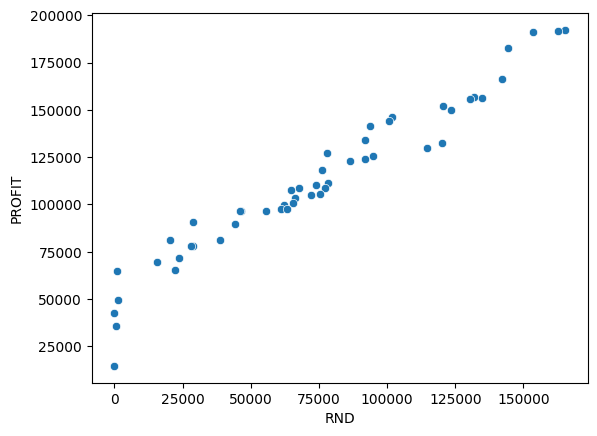

In [8]:
sns.scatterplot(data=df,x='RND',y='PROFIT')

In [9]:
x = df[['RND']]
y = df[['PROFIT']]

In [10]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [11]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## creating a linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

## get the model intercept and coefficent

In [13]:
# B1 value (slope )
model.coef_

array([[0.85429137]])

In [14]:
# B0 value (intercept)
model.intercept_

array([49032.89914125])

## PROFIT_PRED= 49032+0.8542*RND

## visualize the line

<Axes: xlabel='RND', ylabel='PROFIT'>

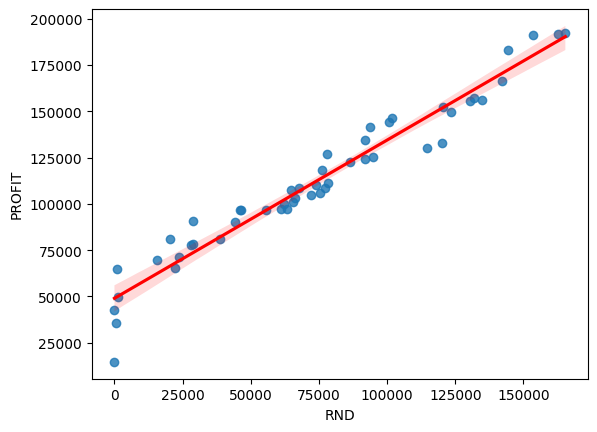

In [15]:
sns.regplot(data=df,x='RND',y='PROFIT',line_kws={'color':'red'})

## predicting out of sample data

In [16]:
x.values

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [17]:
rnd = [[100000]]
profit_pred= model.predict(rnd)
profit_pred

d:\machine learning\repository\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[134462.03623513]])

### model evaluation 
1 mean squared error (MSE)
2. root mean squared error (RMSE)
3.mean absolute error (MAE)
4. Mean absolute percentage error (MAPE)
5. R2 score 

In [19]:
## R2 score 
model.score(x,y)

0.9465353160804393

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
ypred= model.predict(x)

In [25]:
mse = mean_squared_error(y, ypred)
mse

85120931.32706906

In [26]:
rmse = mse**(1/2)
rmse

9226.100548285232

In [27]:
mae= mean_absolute_error(y,ypred)
mae

6910.98435457961

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y,ypred)

In [29]:
mape

0.11070141081984847

In [30]:
from sklearn.metrics import r2_score
r2=r2_score(y,ypred)

In [31]:
r2

0.9465353160804393

## Beacause R2 score > 0.8 the model build is very good and can be use for out of sample predictions